# Numeric Representations of Words

# Load the model that we created in Part 2

# Numeric Representations of Words

In [1]:
from gensim.models import Word2Vec
model = Word2Vec.load("300features_40minwords_10context")

In [2]:
import pandas as pd

  # Read data from files# Read d 
train = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting = 3)
test = pd.read_csv( "testData.tsv", header=0, delimiter="\t", quoting=3 )
unlabeled_train = pd.read_csv("unlabeledTrainData.tsv", header=0, delimiter="\t", quoting = 3)

In [3]:
# Set values for various parameters

num_features = 300 # Word vector dimensionality
min_word_count = 40 # Minimum word count
num_workers = 4 # Threads
context = 10 # Context window size

downsampling = 1e-3 # Downsampling setting fro frequent words

In [4]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review,"lxml").get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

numpy array called "syn0"

In [5]:
# The syn0 in model is moved to model.wv.vectors
type(model.wv.vectors)

numpy.ndarray

In [6]:
print(model.wv.vectors.shape)

(16490, 300)


In [7]:
print(model.wv["flower"])

[-0.02126038 -0.07174639 -0.09453137  0.02006711 -0.00061063  0.04208945
  0.06831188 -0.02231076  0.07070734 -0.06267736 -0.04803132  0.05455393
  0.053824   -0.01698873  0.08780768  0.03812271  0.05156148  0.00542303
  0.12575129  0.02209862  0.05048895 -0.06192749  0.01876858 -0.07182054
  0.0736201   0.01810209  0.11593132 -0.02639383  0.00668718  0.07856153
  0.0070363   0.06570432  0.06874821  0.02721597  0.01020559 -0.03201872
 -0.04692639  0.04517887  0.00139306 -0.011076   -0.03086644  0.09124836
  0.06479169  0.01176843 -0.03789015 -0.01299938  0.00196332 -0.01648852
 -0.00323442  0.08011638  0.09551287 -0.0385311  -0.02601301 -0.0650504
  0.03706691  0.1123137  -0.00666139  0.00765615  0.02689798 -0.11085436
 -0.04756327  0.0966139   0.12006098 -0.04014163  0.17065212  0.07642167
  0.03194519 -0.05441636 -0.0714246  -0.07371986  0.07183339 -0.07540593
 -0.0192629  -0.04693338 -0.02175682  0.03696764  0.03775082 -0.04020536
  0.06246089 -0.00916508  0.07756382  0.07709582 -0.

In [8]:
import numpy as np

In [9]:
def makeFeatureVec(words, model, num_features):

    # Pre-initialize an empty numpy array for speed
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0
    
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.wv.index2word)
    
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set:
            nwords = nwords+1.
            featureVec = np.add(featureVec, model[word])
    
    # Divide the result by the number of words to get the avg
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [10]:
def getAvgFeatureVecs(reviews, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # 
    # Initialize a counter
    counter = 0
    counter = int(counter)
    
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    
    # Loop through the reviews
    for review in reviews:
       #
       # Print a status message every 1000th review
        if counter%1000. == 0.:
            print("Review %d of %d" % (counter, len(reviews)))
        
       # Call the function (defined above) that makes average feature vectors, increment the counter
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)
        counter = counter + 1
        
    return reviewFeatureVecs

In [11]:
# ****************************************************************
# Calculate average feature vectors for training and testing sets,
# using the functions we defined above. Notice that we now use stop word
# removal.

print ("Creating average feature vecs for Training reviews")
clean_train_reviews = []
for review in train["review"]:
    clean_train_reviews.append( review_to_wordlist( review, \
        remove_stopwords=True ))

trainDataVecs = getAvgFeatureVecs( clean_train_reviews, model, num_features )

Creating average feature vecs for Training reviews
Review 0 of 25000


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000


In [12]:
print ("Creating average feature vecs for test reviews")
clean_test_reviews = []
for review in test["review"]:
    clean_test_reviews.append( review_to_wordlist( review, \
        remove_stopwords=True ))

testDataVecs = getAvgFeatureVecs( clean_test_reviews, model, num_features )

Creating average feature vecs for test reviews
Review 0 of 25000


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000


In [13]:
# Fit a random forest to the training data, using 100 trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer

forest = RandomForestClassifier( n_estimators = 100 )

print("Fitting a random forest to labeled training data...")
trainDataVecs = Imputer().fit_transform(trainDataVecs)

forest = forest.fit( trainDataVecs, train["sentiment"] )

Fitting a random forest to labeled training data...


In [14]:
# Test & extract results 
testDataVecs = Imputer().fit_transform(testDataVecs)
result = forest.predict( testDataVecs )

# Write the test results 
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
output.to_csv( "Word2Vec_AverageVectors.csv", index=False, quoting=3 )

# From Words to Paragraphs, Attempt 2: Clustering 

K평균의 방법으로 데이터 분류

In [15]:
from sklearn.cluster import KMeans
import time
start = time.time() # Start time

In [16]:
# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an
# average of 5 words per cluster
word_vectors = model.wv.vectors
num_clusters = int(word_vectors.shape[0] / 5)

In [17]:
%%time
#Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

CPU times: user 10min 32s, sys: 29.7 s, total: 11min 1s
Wall time: 7min 37s


In [18]:
# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print("Time taken for K Means clustering: ", elapsed, "seconds.")

Time taken for K Means clustering:  762.2160449028015 seconds.


In [19]:
# Create a Word / Index dictionary, mapping each vocabulary word to
# a cluster number 
word_centroid_map = dict(zip( model.wv.index2word, idx ))

In [20]:
# For the first 10 clusters
for cluster in range(0,10):
    #
    # Print the cluster number  
    print("\nCluster %d" % cluster)
    #
    # Find all of the words for that cluster number, and print them out
    words = []
    for i in range(0,len(list(word_centroid_map.values()))):
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map)[i])
    print(words)


Cluster 0
['staple', 'benchmark']

Cluster 1
['jayne']

Cluster 2
['founded', 'chambers', 'dumping', 'operated']

Cluster 3
['eyebrows', 'torso', 'veil', 'closeup', 'diet', 'veins']

Cluster 4
['darkness', 'shadow', 'shadows', 'shades', 'tones', 'glow', 'shade', 'lenses']

Cluster 5
['technical', 'stylistic', 'cinematographic', 'staggering', 'subjective', 'filmic', 'meticulous']

Cluster 6
['rebel', 'resistance', 'surrender', 'germs']

Cluster 7
['veers', 'drifting', 'breathes', 'drifts']

Cluster 8
['treats', 'treating']

Cluster 9
['sun', 'mountain', 'storm', 'tower', 'gate', 'towers', 'chamber', 'meteor', 'dam', 'flood', 'ashes', 'hurricane', 'abyss', 'comet', 'collapsing', 'pyramid', 'wtc']


centroids로 중심점과의 거리 계산

In [21]:
def create_bag_of_centroids( wordlist, word_centroid_map ):
    #
    # The number of clusters is equal to the highest cluster index
    # in the word / centroid map
    num_centroids = max( word_centroid_map.values() ) + 1
    #
    # Pre-allocate the bag of centroids vector (for speed)
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )
    #
    # Loop over the words in the review. If the word is in the vocabulary,
    # find which cluster it belongs to, and increment that cluster count 
    # by one
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    #
    # Return the "bag of centroids"
    return bag_of_centroids

In [22]:
# Pre-allocate an array for the training set bags of centroids (for speed)
train_centroids = np.zeros( (train["review"].size, num_clusters), \
    dtype="float32" )

# Transform the training set reviews into bags of centroids
counter = 0
for review in clean_train_reviews:
    train_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1

In [23]:
# Repeat for test reviews 
test_centroids = np.zeros(( test["review"].size, num_clusters), \
    dtype="float32" )

counter = 0
for review in clean_test_reviews:
    test_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1

random forest의 방법으로 학습 후 예측

In [24]:
# Fit a random forest and extract predictions 
forest = RandomForestClassifier(n_estimators = 100)

# Fitting the forest may take a few minutes
print("Fitting a random forest to labeled training data...")
forest = forest.fit(train_centroids,train["sentiment"])
result = forest.predict(test_centroids)

# Write the test results 
output = pd.DataFrame(data={"id":test["id"], "sentiment":result})
output.to_csv( "BagOfCentroids.csv", index=False, quoting=3 )

Fitting a random forest to labeled training data...


In [25]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, train_centroids, train['sentiment'], cv=10,\
    scoring='roc_auc'))

CPU times: user 6min 51s, sys: 4.36 s, total: 6min 55s
Wall time: 6min 57s


In [26]:
%time result = forest.predict(test_centroids)

CPU times: user 1.46 s, sys: 104 ms, total: 1.57 s
Wall time: 1.56 s


In [27]:
score

0.9189265280000001

In [29]:
output = pd.DataFrame(data={"id":test["id"], "sentiment":result})
output.to_csv("submit_BagOfCentroids02_{0:.5f}.csv".format(score), index=False, quoting=3)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

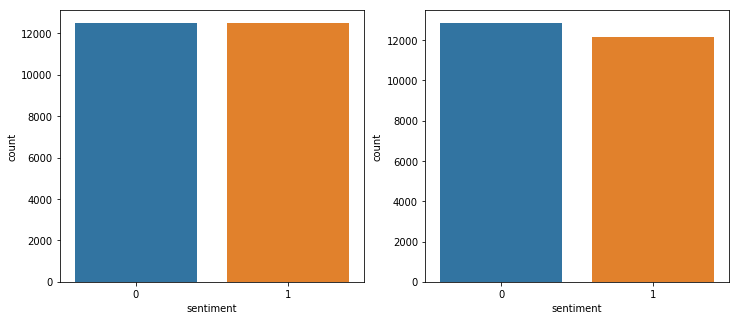

In [32]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])

In [33]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

714


0    12857
1    12143
Name: sentiment, dtype: int64

파이썬3 코드 참고링크
https://github.com/tneupaney/Bag-of-Words-Meets-Bags-of-Popcorn/blob/master/Word%20Vectors%20_2.ipynb

https://github.com/corazzon/KaggleStruggle/blob/master/word2vec-nlp-tutorial/tutorial-part-3-4.ipynb